# Webscrapping using BeautifulSoup

At this module we will learn on how do simple web scrapping using beautiful soup. Web scrapping is one of a method that we can use to colleting the data from internet. At this particular module, we will try to scrap Top 7 Popular movies release in 2021 from https:imdb.com, it's an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews, originally a fan-operated website, the database is now owned and operated by IMDb.com, Inc.To do this we will only use a couple default library from python and BeautifulSoup. 



## Dependencies

Actually to follow this module you only need to install beautifulsoup4 with `pip install beautifulsoup4` and you are good to go. But here some libraries that needed to be installed first that I use at this module : 

- beautifulSoup4
- pandas
- matplotlibs
- seaborn
- flask

## Background

At this project we try to scrap Top 7 Popular movies release in 2021 base on the ratings value from imdb website. IMDb website is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews, originally a fan-operated website, the database is now owned and operated by IMDb.com, Inc . We will try to scrap this sites for Capstone Data Analytics project purpose only.

A lot of you might ask why we need to scrap this data from the sites while it already have a good enough visualisation. Let's say we have task to make a top 7 popular movies in 2021. To do that we need to have the data, and scrapping is a good way to collect the data we don't have from public. 

We will scrap 4 points from this sites. One is Movie Name, it's a title of the movie which release in 2021. Second is IMDb rating, as one adjunct to data, the IMDb offers a rating scale that allows users to rate films on a scale of one to ten. Third is Metascore, METASCORE is considered the rating of a film, scores are assigned to movie's reviews of large group of the world's most respected critics, and weighted average are applied to summarize their opinions range, the higher the Metascore, the more positive reviews a movie has. Fourth is Votes, users can update their votes as often as they'd like, but any new vote on the same title will overwrite the previous one, so it is one vote per title per user.

## What is BeautifulSoup

Beautiful Soup is a Python library for pulling data out of HTML and XML files. Beautiful Soup 3 only works on Python 2.x, but Beautiful Soup 4 also works on Python 3.x. Beautiful Soup 4 is faster, has more features, and works with third-party parsers
like lxml and html5lib.

Since beautifulsoup used to pull the data out of a HTML, so first we need to pull out the html first. How we do it? We will use default library `request`. 

So all this code is doing is sending a GET request to spesific address we give. This is the same type of request your browser sent to view this page, but the only difference is that Requests can't actually render the HTML, so instead you will just get the raw HTML and the other response information.

We're using the .get() function here, but Requests allows you to use other functions like .post() and .put() to send those requests as well. At this case we will going to the imdb movies release in 2021 website, you can click [here](https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31) to follow what exactly that link goes to. 

### Getting the HTML from the Webpage

In [55]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [56]:
url_get.content[1:700]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2021-01-01 and 2021'


As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 
​
Let's make Beautiful soup object and feel free to explore the object here.

In [57]:
from bs4 import BeautifulSoup 

In [58]:
url = "https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31"
url_get = requests.get(url)
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 500 character. 

In [59]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <scrip


### Getting right key to extract right information

Find the key and put the key into the `.find()` or `.findAll` Put all the exploring the right key at this cell. From the web page we have to find the information of the movie title, rating, metascore, and votes value, this is the main information that we need to analyzing in dataframe to find out top 7 movies base on the rating value , but we can explore to get other information for other analyzing, we should search the lines that we want to use, let's check it into the web page first then copy the right line into the process :

### Do the scrapping process here :

In [60]:
# to make it easier to check, find the attribute which show all information that we need
# the attribute show the whole information in one movie
movie_data = soup.findAll('div', attrs={'class':'lister-item mode-advanced'})
movie_data[0]

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt9140554"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt9140554/"> <img alt="Loki" class="loadlate" data-tconst="tt9140554" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNTkwOTE1ZDYtODQ3Yy00YTYwLTg0YWQtYmVkNmFjNGZlYmRiXkEyXkFqcGdeQXVyNTc4MjczMTM@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt9140554/">Loki</a>
<span class="lister-item-year text-muted unbold">(2021– )</span>
</h3>
<p class="text-muted">
<span class="genre">
Action, Adventure, Fantasy            </span>
</p>
<div class="ratings-bar">
<div class="inline-block ratings-imdb-rating" data-value="8.9" name="ir">
<span class="global-s

### Extracting the Information

Now all the `beautiful soup` part is over. All left to do is doing some programming to extract all the data automatically, we can do this manualy at this part, due to the data too long I'm using loop method, then we start to get the right information in the process below :

In [61]:
temp = []

for store in movie_data:
    
    #get movie title
    Movie_Title = store.h3.a.text
        
    #get movie duration (optional)
    Runtime_Minute = store.p.find ('span', class_ ='runtime').text.replace('min','').replace(' ','') if store.p.find ('span', class_ ='runtime') else '0'
        
    #get movie rating
    Rating = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n','') if store.find('div', class_ = 'inline-block ratings-imdb-rating') else '0' 
    
    #get metascore
    Metascore = store.find('span', class_= 'metascore').text.replace(' ','') if store.find('span', class_= 'metascore') else '0'
    
    #get votes 
    Votes = store.find('span', attrs = {'name': "nv"}).text if store.find('span', attrs = {'name': "nv"}) else '0'
    
    
    temp.append((Movie_Title,Runtime_Minute,Rating,Metascore,Votes))

temp

[('Loki', '0', '8.9', '0', '72,588'),
 ('The Tomorrow War', '140', '6.7', '45', '76,124'),
 ('Sex/Life', '0', '5.5', '0', '6,325'),
 ('F9', '143', '5.5', '58', '28,495'),
 ('The Many Saints of Newark', '0', '0', '0', '0'),
 ('Luca', '95', '7.5', '71', '55,615'),
 ('Fear Street', '107', '6.2', '67', '19,970'),
 ('The Ice Road', '109', '5.5', '42', '13,840'),
 ('No Sudden Move', '115', '6.6', '77', '8,547'),
 ('Black Widow', '133', '7.1', '68', '43,552'),
 ('In the Heights', '143', '7.5', '84', '25,231'),
 ('Cruella', '134', '7.4', '59', '88,042'),
 ('Mare of Easttown', '410', '8.5', '0', '69,716'),
 ('Sweet Tooth', '0', '8.0', '0', '30,508'),
 ('Good on Paper', '92', '5.6', '54', '6,068'),
 ('X-Ray: Selected Satyajit Shorts', '65', '7.4', '0', '5,618'),
 ('Raya and the Last Dragon', '107', '7.4', '75', '92,839'),
 ('Fatherhood', '109', '6.7', '53', '20,274'),
 ('Jolt', '0', '0', '0', '0'),
 ('The Suicide Squad', '0', '0', '0', '0'),
 ('The Mysterious Benedict Society', '0', '7.7', '0', 

That the result we get, At this point we can input it to a pandas' DataFrame and do usual data analysis, in this case for the empty data which have no information , I fill it into the zero value, why I put zero value because zero value will not effect if I'm using aggregation function for further analyzing, just for this case, I'm not suggest to use it for other datasheet, because we have to check the data information first. 

## Creating Pandas Dataframe & Data Wrangling

Put the array into dataframe

In [62]:
movie_df = pd.DataFrame(temp, columns = ('Movie_Title','Runtime_Minute','Rating','Metascore','Votes'))
movie_df

,Movie_Title,Runtime_Minute,Rating,Metascore,Votes
0,Loki,0,8.9,0,"72,588"
1,The Tomorrow War,140,6.7,45,"76,124"
2,Sex/Life,0,5.5,0,"6,325"
3,F9,143,5.5,58,"28,495"
4,The Many Saints of Newark,0,0,0,0
5,Luca,95,7.5,71,"55,615"
6,Fear Street,107,6.2,67,"19,970"
7,The Ice Road,109,5.5,42,"13,840"
8,No Sudden Move,115,6.6,77,"8,547"
9,Black Widow,133,7.1,68,"43,552"


let's check our dataframe data types to see if our data is usable :

In [63]:
movie_df.dtypes

Movie_Title       object
Runtime_Minute    object
Rating            object
Metascore         object
Votes             object
dtype: object

as usual we can clean the data and save it to csv, let's do some cleaning then we can do a bit of visualization.We will change `rating and votes columns into float datatype`, but  before we change it, replace string character in votes columns change this symbol `"," into "."` in votes value, we can use `str.replace()` method, and for the `metascore and runtime we change the datatype into int64`, ok let's modifying the datatype first :

In [64]:
movie_df['Rating'] = movie_df['Rating'] .astype('float')
movie_df['Metascore'] = movie_df['Metascore'] .astype('int64')
movie_df['Runtime_Minute'] = movie_df['Runtime_Minute'] .astype('int64')
movie_df['Votes'] = movie_df['Votes'].str.replace(',', ".").astype(float)

In [65]:
movie_df.dtypes

Movie_Title        object
Runtime_Minute      int64
Rating            float64
Metascore           int64
Votes             float64
dtype: object

In [66]:
# save dataframe into csv file in your local pc

movie_df.to_csv('imdb_movies.csv')

we can describe now for all data include object datatypes or you can describe just numeric datatype :

In [67]:
movie_df.describe().round(1)

,Runtime_Minute,Rating,Metascore,Votes
count,50.0,50.0,50.0,50.0
mean,84.4,6.0,28.3,47.2
std,91.0,2.7,30.2,115.9
min,0.0,0.0,0.0,0.0
25%,0.0,5.5,0.0,2.6
50%,92.0,6.6,14.0,13.3
75%,111.2,7.5,56.2,65.0
max,410.0,9.3,84.0,797.0


Then lets analyze the dataframe and make a plot for top 7 popular movies base on the movie rating , to make a plot a little bit nice to display, I'm using seaborn package, import the package first then process the dataframe and the plot, due to this related to the ranked of the movies so I decide it to use barplot to visualize the chart :

In [68]:
top7 = movie_df.nlargest(7,'Rating')[['Movie_Title','Rating']].set_index('Movie_Title')
top7

,Rating
Movie_Title,
Clarkson's Farm,9.3
Loki,8.9
Invincible,8.8
Grahan,8.7
Mare of Easttown,8.5
Time,8.4
Star Wars: The Bad Batch,8.3


[Text(0.5, 1.0, 'Top 7 Movies by Rating')]

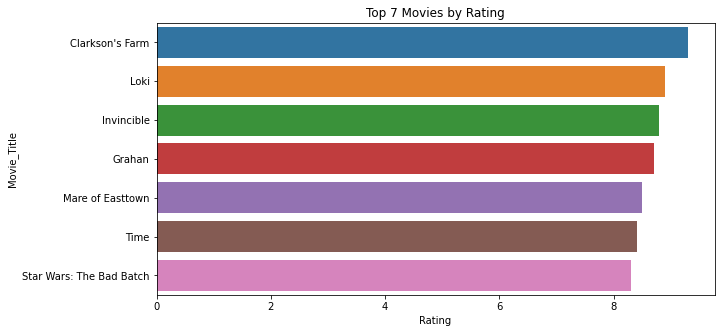

In [69]:
plt.figure(figsize=(10,5))
sns.barplot(x='Rating',y=top7.index,data=top7).set(title='Top 7 Movies by Rating')

Insight : 

* from the output result in dataframe and the chart (barplot) we can summarize top 7 popular movie by rating is : Clarkson's Farm, with the maximum rating value 9.3, and follow by Loki 8.9, Invincible 8.8, Grahan 8.7, Mare of Easttown 8.5, Time 8.4 and the last one is Star Wars with the maximum rating 8.3

### optional analyzing 
* From the dataframe also we can find out the long duration movies and classify the movies base on the ratings, I just take top 7 long duration movies, the same as the above rating chart :

In [70]:
# Top 7 long duration movies 

longdur=movie_df.nlargest(7,'Runtime_Minute')[['Movie_Title','Runtime_Minute']].set_index('Movie_Title')
longdur

,Runtime_Minute
Movie_Title,
Mare of Easttown,410
Invincible,364
WandaVision,350
Army of the Dead,148
F9,143
In the Heights,143
The Tomorrow War,140


[Text(0.5, 1.0, 'Top 7 Long Duration Movies')]

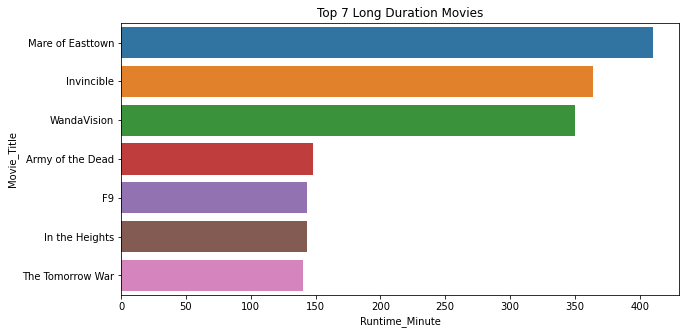

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(x='Runtime_Minute',y=longdur.index,data=longdur).set(title='Top 7 Long Duration Movies')

Insight : 

* Base on the chart in the barplot we can see that the long duration movie is : Mare of Easttown with time duration is 400 minute, its around 6 hours

In [72]:
# classify the movies base on rating value

def rating(rating):
    if rating>=7.0:
        return "Excellent"
    elif rating>=6.0:
        return 'Good'
    else:
        return 'Average'

In [73]:
movie_df['RatingCategory']=movie_df['Rating'].apply(rating)
movie_df.head()

,Movie_Title,Runtime_Minute,Rating,Metascore,Votes,RatingCategory
0,Loki,0,8.9,0,72.588,Excellent
1,The Tomorrow War,140,6.7,45,76.124,Good
2,Sex/Life,0,5.5,0,6.325,Average
3,F9,143,5.5,58,28.495,Average
4,The Many Saints of Newark,0,0.0,0,0.000,Average


In [74]:
ExcMovies= movie_df.groupby('RatingCategory')
ExcMovies.get_group('Excellent')

,Movie_Title,Runtime_Minute,Rating,Metascore,Votes,RatingCategory
0,Loki,0,8.9,0,72.588,Excellent
5,Luca,95,7.5,71,55.615,Excellent
9,Black Widow,133,7.1,68,43.552,Excellent
10,In the Heights,143,7.5,84,25.231,Excellent
11,Cruella,134,7.4,59,88.042,Excellent
12,Mare of Easttown,410,8.5,0,69.716,Excellent
13,Sweet Tooth,0,8.0,0,30.508,Excellent
15,X-Ray: Selected Satyajit Shorts,65,7.4,0,5.618,Excellent
16,Raya and the Last Dragon,107,7.4,75,92.839,Excellent
20,The Mysterious Benedict Society,0,7.7,0,797.000,Excellent


In [75]:
ExcMovies.get_group('Excellent').count()

Movie_Title       23
Runtime_Minute    23
Rating            23
Metascore         23
Votes             23
RatingCategory    23
dtype: int64

insight : There are 23 movies categorize as an Excellent movies

We already finish our web scrapping job, now we have all the data we need and we can move on to the next part. In conclusion from the data above we can get top 7 popular movies in 2021, the first Movies goes to Clarkson's Farm with the maximum rating value 9.3, and follow by Loki 8.9, Invincible 8.8, Grahan 8.7, Mare of Easttown 8.5, Time 8.4 and the last one is Star Wars with the maximum rating 8.3. Other optional analyzing I found out the long duration movies also in 2021, and it goes to  Mare of Easttown with time duration is 400 minute, its around 6 hours, and I classifying the movies also base on the ratings value, from the result we get 23 movies categorize as an Excellent movies. when you don't have a direct access to a data from a website you can always do the scrapping method. For this case Im using beautiful soup since I myself still learn also from this capstone project :) and it's more beginner friendly and a helpful utility that allows a programmer to get specific elements out of a webpage. 

After this I will implement the scrapping to one function and put it at the flask webapp, but in this case I just display the top 7 popular movies in 2021 base on the maximum rating values in the flask webapp, since I'm still learning also for the flask webapp maybe other plot will get on the next project...:)
